Цель: В этом домашнем задании вам предстоит обойти все ловушки серверов, пробраться сквозь страницы html-кода и собрать себе свой собственный датасет.

По аналогии с занятием, возьмите интересующий вас сайт, на котором можно пособирать какие-то данные (и при этом API не предоставляется).
Напишите свой парсер, который будет бегать по страничкам и автоматически что-то собирать.

В качестве потенциальных целей для парсинга можно взять какие-нибудь блоги, выкачать оттуда публикации, авторов, число просмотром и комментариев. Можно посмотреть новостные ресурсы и скачать новостные статьи с их мета-информацией. Или любой другой интересный вам сайт.

Не забывайте, что парсинг - это ответственное мероприятие, поэтому не бомбардируйте несчастные сайты слишком частыми запросами (можно ограничить число запросов в секунду при помощи time.sleep(0.3), вставленного в теле цикла)

In [1]:
import requests
import re
from bs4 import BeautifulSoup
import pandas as pd
import time
import sys

from tqdm import tqdm_notebook

In [2]:
news_url = 'http://ratel.kz/raw/?page='

In [3]:
home_url = 'http://ratel.kz'

In [4]:
page = 1

In [5]:
requests.get(news_url+str(page))

<Response [200]>

In [6]:
news_page = requests.get(news_url+str(page))
news_page = news_page.content

In [7]:
news_page = BeautifulSoup(news_page, 'lxml')

In [8]:
news_page = news_page.find('div', attrs={'class':'col-sm-8 col-sm-push-1'})

In [9]:
def get_articles(news_page):
    articles = news_page.findAll('div', attrs={'class':'article article_list'})
    return articles

In [10]:
articles = get_articles(news_page)

In [11]:
def get_article(news_page):
    article = news_page.find('div', attrs={'class':'article article_list'})
    return article

#### Заголовки новостей

In [12]:
def get_header(article):
    header = article.find('div', attrs = {'class':'article__title'})
    header = header.text.strip()
    return header

In [13]:
get_header(news_page)

'1 миллион тенге выплатит чиновник, взявший 1 тысячу за бесплатную госуслугу'

In [14]:
for article in articles:
    print(get_header(article))

1 миллион тенге выплатит чиновник, взявший 1 тысячу за бесплатную госуслугу
Владельцам кафе и ресторанов Талдыкоргана начали выписывать штрафы
Очередные слухи о путях  распространения коронавируса обсуждают в Талдыкоргане
Производители антисептика связаны по рукам
О карантине, медицинских масках, продуктах и лекарствах рассказал на брифинге вице-премьер РК
О возрастном цензе заболевших COVID-19  в Нур-Султане сообщили в горздраве столицы
В Караганде у двух пациентов обнаружили коронавирус
Денсаулық министрлігі Қарағандыда кімдер коронавирус жұқтырғанын айтып берді
Елбасы Нурсултан Назарбаев обратился к казахстанцам
Субъекты малого и среднего бизнеса смогут получить льготный кредит сроком на год
Уже одиннадцать очагов заражения коронавирусом установили в различных частях Алматы
Танки в городе
Information on passenger flights to/from Nur-Sultan and Almaty
Актюбинского адвоката заподозрили в мошенничестве
Акимат Усть-Каменогорска судится с подрядчиком из-за долгостроя
Инфекция ошақтары ту

#### Короткий текст статьи

In [15]:
def get_short_text(article):
    short_text = article.find('div', attrs = {'class':'article__text'}).text
    short_text = short_text.strip()
    return short_text

In [16]:
for article in articles:
    print(get_short_text(article))

Житель Семея, решивший отблагодарить государственного служащего, оштрафован на полмиллиона
На самых злостных нарушителей будут заводить уголовные дела
На этот раз в поле зрения горожан попал  местный аэропорт
Из-за бюрократии в СКО не могут начать продавать востребованный в условиях ЧП отечественный антисептик
Ералы Тугжанов отметил, что 70% чиновников уже перешли на дистанционную работу
Также стали известны сроки внедрения экспресс-тестов на коронавирус
Оба заражённых – пассажиры рейса "Минск-Нур-Султан". Карантин вводить не будут
Алматы қаласында жиырма екі адам, Қарағандыда екі, Нұр-Сұлтанда жиырма бес адамда коронавирус анықталды
Он призвал поддержать действия президента страны Касым-Жомарта Токаева и правительства РК
Глава государства  объявил о новых мерах поддержки малого и среднего бизнеса в условиях ЧП
Все очаги в настоящее время берут под контроль
Скопление бронетехники около Аягоза напугало восточно-казахстанцев
The Civil Aviation Committee recommends to passengers do not tr

#### Страничка одной статьи

In [17]:
def get_link(article):
    link = article.find('a', attrs= {'class':'article__img-link'}).get('href')
    return link

In [18]:
for article in articles:
    print(get_link(article))

/raw/1_million_tenge_vyplatit_chinovnik_vzjavshij_1_tysjachu_za_besplatnuju_gosuslugu
/raw/vladeltsam_kafe_i_restoranov_taldykorgana_nachali_vypisyvat_shtrafy
/raw/ocherednye_sluhi_o_putjah_rasprostranenija_koronavirusa_obsuzhdajut_v_taldykorgane
/raw/proizvoditeli_antiseptika_svjazany_po_rukam
/raw/o_karantine_meditsinskih_maskah_produktah_i_lekarstvah_rasskazal_na_brifinge_vitse_premer_rk_
/raw/o_vozrastnom_tsenze_zabolevshih_covid_19_v_nur_sultane_soobschili_v_gorzdrave_stolitsy
/raw/v_karagande_u_dvuh_patsientov_obnaruzhili_koronavirus
/raw/densauly_ministrligi_araandyda_kimder_koronavirus_zhtyranyn_ajtyp_berdi
/raw/elbasy_nursultan_nazarbaev_obratilsja_k_kazahstantsam
/raw/subekty_malogo_i_srednego_biznesa_smogut_poluchit_lgotnyj_kredit_srokom_na_god
/raw/uzhe_odinnadtsat_ochagov_zarazhenija_koronavirusom_ustanovili_v_razlichnyh_chastjah_almaty
/raw/tanki_v_gorode
/raw/information_on_passenger_flights_tofrom_nur_sultan_and_almaty
/raw/aktjubinskogo_advokata_zapodozrili_v_moshennic

In [19]:
article = get_article(news_page)

In [20]:
def get_subpage(link):
    sub_page = requests.get(home_url+str(link)).content
    sub_page = BeautifulSoup(sub_page, 'lxml')
    return sub_page

In [21]:
news_link = get_link(article)

In [22]:
sub_page = get_subpage(news_link)

#### Просмотры статьи

In [23]:
def get_views(sub_page):
    post_views = sub_page.find('div', attrs={'class':'post__views'})
    text = post_views.text
    views = text.strip().split()[0]
    return int(views)

In [24]:
get_views(sub_page)

51

#### Дата публикации

In [25]:
import datetime
import locale
locale.setlocale(locale.LC_TIME, 'ru_RU.UTF-8')

'ru_RU.UTF-8'

In [26]:
# def get_date(news_page):
#     pattern = re.compile(r'[\d]{1,2}[\s]{1}[А-я]{3}[\s]{1}[\d]{4}')
#     text = news_page.find('div', attrs = {'class':'article__date'}).text
#     date = re.match(pattern, text).group(0)
#     return date if date else ""

# get_date(news_page)

In [27]:
def get_datetime(article):
    article_info = article.find('div', attrs = {'class':'article__date'}).text
    time_data = article_info.split(" — ")[0]
    date = datetime.datetime.strptime(time_data, '%d %b %Y, %H:%M')
    return date

In [28]:
for article in articles:
    print(get_datetime(article))

2020-03-20 16:50:00
2020-03-20 16:20:00
2020-03-20 15:20:00
2020-03-20 14:35:00
2020-03-20 14:30:00
2020-03-20 13:50:00
2020-03-20 12:35:00
2020-03-20 11:00:00
2020-03-20 09:05:00
2020-03-20 08:35:00
2020-03-20 08:05:00
2020-03-19 18:40:00
2020-03-19 18:30:00
2020-03-19 18:00:00
2020-03-19 17:30:00
2020-03-19 17:00:00


https://stackoverflow.com/questions/41839678/how-to-use-russian-date-string-with-strptime


#### Автор статьм

In [29]:
article = news_page.find('div', attrs= {'class':'article__date'})

In [30]:
def get_author(article):
    article_info = article.find('div', attrs = {'class':'article__date'}).text
    article_info = article_info.split(" — ")
    author = article_info[1].strip()
    return author

In [31]:
for article in articles:
    print(get_author(article))

Антон СЕРГИЕНКО
Алия АХМЕДИЕВА
Алия АХМЕДИЕВА
Ольга ВАЙТОВИЧ
Ратель
Асем  МИРЖЕКЕЕВА
Анастасия БАГРОВА
Ратель
Ратель
Ратель
Ратель
Антон СЕРГИЕНКО
Ратель
Дмитрий МАТВЕЕВ
Антон СЕРГИЕНКО
Ратель


###  Получим все статьи с одной новостной странички

In [32]:
def get_article_data(article):
    news_link = get_link(article)
    sub_page = get_subpage(news_link)
    article_data = {
        'header': get_header(article),
        'author': get_author(article),
        'date': get_datetime(article),
        'views': get_views(sub_page),
        'short_text': get_short_text(article)
    }
    return article_data

In [33]:
def get_news(page):
    news_page = requests.get(news_url+str(page))
    news_page = news_page.content
    news_page = BeautifulSoup(news_page, 'lxml')  
    news_page = news_page.find('div', attrs={'class':'col-sm-8 col-sm-push-1'})
    return news_page

In [34]:
news_page = get_news(1)
articles = get_articles(news_page)

for article in articles:
    article_data = get_article_data(article)
    print(article_data['header'])
    print(f"Написано: {article_data['author']}, Опубликовано: {article_data['date']}")
    print(article_data['views'])
    print('====================')
    time.sleep(0.3)

1 миллион тенге выплатит чиновник, взявший 1 тысячу за бесплатную госуслугу
Написано: Антон СЕРГИЕНКО, Опубликовано: 2020-03-20 16:50:00
53
Владельцам кафе и ресторанов Талдыкоргана начали выписывать штрафы
Написано: Алия АХМЕДИЕВА, Опубликовано: 2020-03-20 16:20:00
145
Очередные слухи о путях  распространения коронавируса обсуждают в Талдыкоргане
Написано: Алия АХМЕДИЕВА, Опубликовано: 2020-03-20 15:20:00
183
Производители антисептика связаны по рукам
Написано: Ольга ВАЙТОВИЧ, Опубликовано: 2020-03-20 14:35:00
357
О карантине, медицинских масках, продуктах и лекарствах рассказал на брифинге вице-премьер РК
Написано: Ратель, Опубликовано: 2020-03-20 14:30:00
147
О возрастном цензе заболевших COVID-19  в Нур-Султане сообщили в горздраве столицы
Написано: Асем  МИРЖЕКЕЕВА, Опубликовано: 2020-03-20 13:50:00
643
В Караганде у двух пациентов обнаружили коронавирус
Написано: Анастасия БАГРОВА, Опубликовано: 2020-03-20 12:35:00
589
Денсаулық министрлігі Қарағандыда кімдер коронавирус жұқтырға

## Parsing start

In [35]:
news = pd.DataFrame(columns=['header', 'author', 'date',  'views', 'short_text'])

In [36]:
total_pages = 10

In [37]:
# for page_number in tqdm_notebook(range(total_pages)):

#     news_page = get_news(page_number)
#     articles = get_articles(news_page)
    
#     for article in tqdm_notebook(articles, leave=False):
#         try:
#             article_data = get_article_data(article)
#             news = news.append(article_data, ignore_index=True)
#             time.sleep(0.3)
#         except:
#             pass

In [38]:
for page_number in range(total_pages):

    news_page = get_news(page_number)
    articles = get_articles(news_page)
    
    for article in articles:
        try:
            article_data = get_article_data(article)
            news = news.append(article_data, ignore_index=True)
            time.sleep(0.3)
        except:
            pass

In [39]:
news.head()

,header,author,date,views,short_text
0,"1 миллион тенге выплатит чиновник, взявший 1 т...",Антон СЕРГИЕНКО,2020-03-20 16:50:00,55,"Житель Семея, решивший отблагодарить государст..."
1,Владельцам кафе и ресторанов Талдыкоргана нача...,Алия АХМЕДИЕВА,2020-03-20 16:20:00,149,На самых злостных нарушителей будут заводить у...
2,Очередные слухи о путях распространения корон...,Алия АХМЕДИЕВА,2020-03-20 15:20:00,184,На этот раз в поле зрения горожан попал местн...
3,Производители антисептика связаны по рукам,Ольга ВАЙТОВИЧ,2020-03-20 14:35:00,358,Из-за бюрократии в СКО не могут начать продава...
4,"О карантине, медицинских масках, продуктах и л...",Ратель,2020-03-20 14:30:00,148,"Ералы Тугжанов отметил, что 70% чиновников уже..."


### Analytics

In [40]:
news = news.drop_duplicates().reset_index(drop=True)

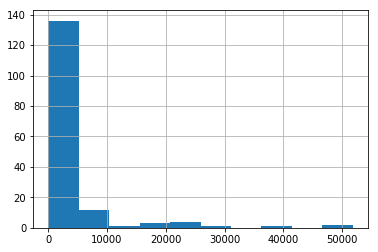

In [45]:
news.views.astype(int).hist()

In [42]:
news[news.views == max(news.views)]

,header,author,date,views,short_text
34,"27-летний актюбинец ""заработал"" на ажиотаже 1 ...",Дмитрий МАТВЕЕВ,2020-03-19 15:15:00,51797,В областном центре задержали спекулянта медици...


In [43]:
news.loc[34].header

'27-летний актюбинец "заработал" на ажиотаже 1 млн 800 тыс. тенге'

In [47]:
news.loc[129].short_text

'Власти успокаивают семейчан, уверяя, что всё под контролем'

In [46]:
news.views.sort_values(ascending=False)

34     51797
129    49478
158    40091
132    30377
122    23378
95     22627
64     22108
57     21556
68     20027
61     18684
150    15791
110    14340
113     9398
85      9039
135     7836
131     7358
115     7188
107     6926
80      6745
121     6684
143     6446
84      6423
139     6408
53      5854
32      4764
128     4635
100     4458
157     4038
130     3720
123     3705
       ...  
79       345
23       339
7        338
99       337
58       336
39       324
134      318
59       315
44       300
144      300
63       252
28       233
12       232
54       226
31       207
15       206
67       205
86       204
89       201
18       187
2        184
98       171
56       167
17       151
20       149
1        149
4        148
66       121
16        57
0         55
Name: views, Length: 160, dtype: object